# Data Preparation
The raw data collected from the Arquivo.pt API should be cleaned and prepared for the further data analysis and search system implementarion in posterior stages of the project. Therefore all the data, especially the textual one, should be normalized to fit better search criteria.

Firstly we import all of the relevant packages for the data cleanup.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

### Preliminary Data Analysis:
We start by examining the data collected to better grasp it's extent and content.

In [51]:
df = pd.read_json("data/ps_merged.json")
df.shape

(44431, 5)

In [52]:
df.columns

Index(['date', 'link', 'contentLength', 'type', 'text'], dtype='object')

#### Data Preview:

In [53]:
df.head()

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,\n \nXXI CONGRESO NACIONAL DO PARTIDO SOCIALI...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xml\nSitemap: ht...


### Cleaning Unrecognized Characters in Data:

Our text field has multiple unrecognized characters and escape sequences that are unuseful so we removed them.

In [54]:
df["text"]=pd.Series(df['text'], dtype="string")

df["text"]=df["text"].str.replace("[\n\t\r]","",regex=True)
df["text"]=df["text"].str.replace(" +"," ",regex=True)

df

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,XXI CONGRESO NACIONAL DO PARTIDO SOCIALISTA M...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
...,...,...,...,...,...
44426,2020-09-03 15:51:03,https://arquivo.pt/wayback/20200903155103/http...,5014,application/pdf,FEDERAÇÃO DISTRITAL DE AVEIRO Ver verso da ...
44427,2020-09-03 15:52:11,https://arquivo.pt/wayback/20200903155211/http...,2204,application/pdf,FEDERAÇÃO DISTRITAL DO PORTO Ver verso da fol...
44428,2020-09-03 15:52:28,https://arquivo.pt/wayback/20200903155228/http...,3531,application/pdf,FEDERAÇÃO DISTRITAL DE VILA REAL Ver verso ...
44429,2020-09-03 15:53:17,https://arquivo.pt/wayback/20200903155317/http...,2472,application/pdf,FEDERAÇÃO DISTRITAL DA ÁREA URBANA DE LISBO...


### Analysing Null Values:
Since our dataset is collected using the Arquivo.pt API, no null values are considered globally.

In [55]:
df.isnull().sum().sum()

0

#### Checking Empty Text Fields:

In [56]:
df[df["text"]==""]

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,
43,2018-07-21 18:41:09,https://arquivo.pt/wayback/20180721184109/http...,0,text/html,
45,2018-07-21 18:53:02,https://arquivo.pt/wayback/20180721185302/http...,0,text/html,
50,2018-07-28 03:02:21,https://arquivo.pt/wayback/20180728030221/http...,0,text/html,
...,...,...,...,...,...
44256,2018-06-15 12:08:36,https://arquivo.pt/wayback/20180615120836/http...,0,application/octet-stream,
44257,2018-06-16 10:57:51,https://arquivo.pt/wayback/20180616105751/http...,0,application/octet-stream,
44258,2018-06-17 10:06:33,https://arquivo.pt/wayback/20180617100633/http...,0,application/octet-stream,
44259,2018-06-17 09:17:55,https://arquivo.pt/wayback/20180617091755/http...,0,application/json,


#### Replacing Empty Text With Null Values:

In [57]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,date,link,contentLength,type,text
0,2017-02-22 18:39:09,https://arquivo.pt/wayback/20170222183909/http...,0,text/html,<NA>
1,2017-06-08 03:35:16,https://arquivo.pt/wayback/20170608033516/http...,0,text/html,<NA>
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,XXI CONGRESO NACIONAL DO PARTIDO SOCIALISTA M...
4,2018-05-24 01:48:28,https://arquivo.pt/wayback/20180524014828/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
...,...,...,...,...,...
44426,2020-09-03 15:51:03,https://arquivo.pt/wayback/20200903155103/http...,5014,application/pdf,FEDERAÇÃO DISTRITAL DE AVEIRO Ver verso da ...
44427,2020-09-03 15:52:11,https://arquivo.pt/wayback/20200903155211/http...,2204,application/pdf,FEDERAÇÃO DISTRITAL DO PORTO Ver verso da fol...
44428,2020-09-03 15:52:28,https://arquivo.pt/wayback/20200903155228/http...,3531,application/pdf,FEDERAÇÃO DISTRITAL DE VILA REAL Ver verso ...
44429,2020-09-03 15:53:17,https://arquivo.pt/wayback/20200903155317/http...,2472,application/pdf,FEDERAÇÃO DISTRITAL DA ÁREA URBANA DE LISBO...


#### Number of Missing Data:

In [58]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Number', 'Percent'])
missing_data

,Number,Percent
date,0,0.000000
link,0,0.000000
contentLength,0,0.000000
type,0,0.000000
text,22922,51.590106


#### Missing Text per Website Type:

In [59]:
total_values_per_type = df['type'].value_counts()
missing_values_per_type = df.loc[df['text'].isnull(), 'type'].value_counts()
percent = (missing_values_per_type / total_values_per_type) * 100
missing_values = pd.concat([missing_values_per_type, total_values_per_type, percent], axis=1, keys=['Missing Text', 'Total', 'Percent']).fillna(0)
missing_values

,Missing Text,Total,Percent
application/json,14907.0,14954,99.685703
text/html,4841.0,25037,19.335384
application/octet-stream,1440.0,1445,99.653979
text/calendar,731.0,737,99.185889
application/vnd.ms-fontobject,448.0,450,99.555556
application/x-javascript,278.0,278,100.000000
text/css,150.0,150,100.000000
image/png,72.0,72,100.000000
image/jpeg,16.0,16,100.000000
image/svg+xml,10.0,10,100.000000


##### Plot:

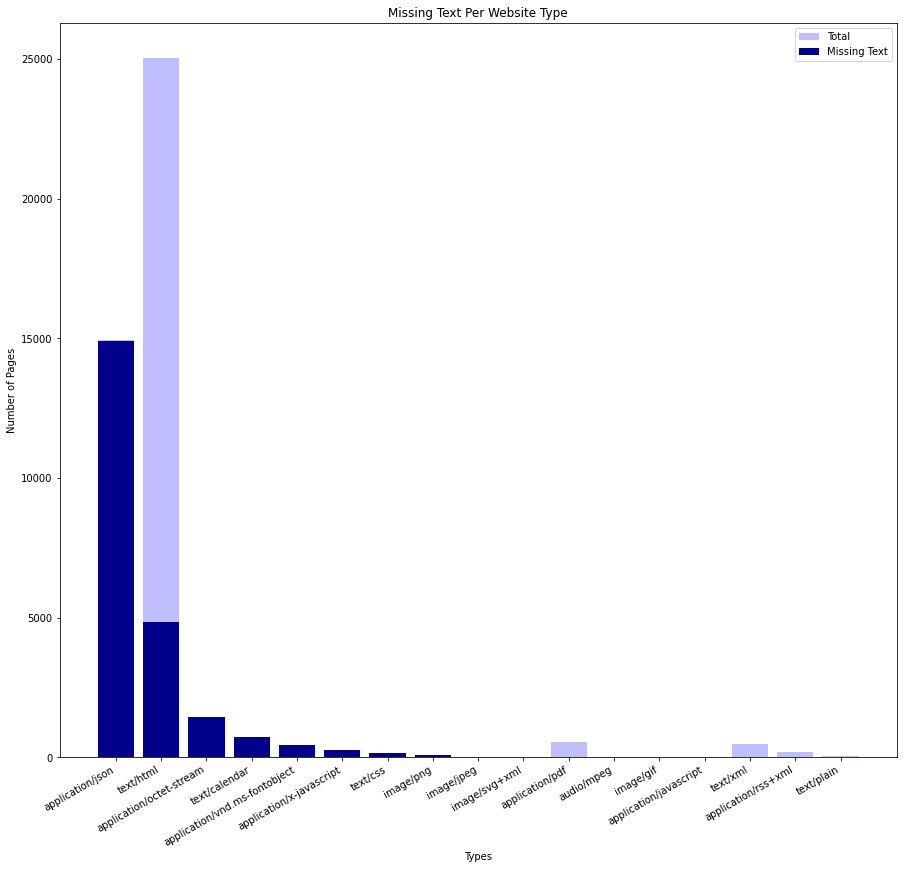

In [73]:
labels = missing_values.index.to_list()

fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(labels)):
    plt.bar(labels[i], missing_values['Total'][i], alpha=0.25, color= "blue")
    plt.bar(labels[i], missing_values['Missing Text'][i], color= "darkblue")

plt.title('Missing Text Per Website Type')
plt.legend(labels = ["Total", "Missing Text"])
plt.xlabel('Types')
plt.ylabel('Number of Pages')
fig.autofmt_xdate()

plt.show()

#### Removing Missing Text Lines:

In [66]:
df = df.dropna()
df

,date,link,contentLength,type,text
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,XXI CONGRESO NACIONAL DO PARTIDO SOCIALISTA M...
5,2018-07-28 02:31:30,https://arquivo.pt/wayback/20180728023130/http...,4786,text/html,Partido Socialista – Página oficial do Partido...
6,2018-07-18 13:28:07,https://arquivo.pt/wayback/20180718132807/http...,11490,text/html,Regulamento e Documentos – Partido Socialista ...
7,2018-07-21 19:07:12,https://arquivo.pt/wayback/20180721190712/http...,1696,text/html,Comissão Permanente – Partido Socialista Twitt...
...,...,...,...,...,...
44426,2020-09-03 15:51:03,https://arquivo.pt/wayback/20200903155103/http...,5014,application/pdf,FEDERAÇÃO DISTRITAL DE AVEIRO Ver verso da ...
44427,2020-09-03 15:52:11,https://arquivo.pt/wayback/20200903155211/http...,2204,application/pdf,FEDERAÇÃO DISTRITAL DO PORTO Ver verso da fol...
44428,2020-09-03 15:52:28,https://arquivo.pt/wayback/20200903155228/http...,3531,application/pdf,FEDERAÇÃO DISTRITAL DE VILA REAL Ver verso ...
44429,2020-09-03 15:53:17,https://arquivo.pt/wayback/20200903155317/http...,2472,application/pdf,FEDERAÇÃO DISTRITAL DA ÁREA URBANA DE LISBO...


### Remove Duplicates:
Some of the websites fetched are the same instances of the same webpage but colleted in a different timestamp, so it's unnecessary to have the same text content repeated in the dataset, given that the search system will only need to search the text.

In [69]:
df.drop_duplicates(subset=['text'],
                     keep='last', inplace=True)
df

,date,link,contentLength,type,text
2,2018-05-22 09:34:02,https://arquivo.pt/wayback/20180522093402/http...,175,text/plain,Sitemap: http://ps.pt/sitemap.xmlSitemap: http...
3,2018-05-24 01:49:12,https://arquivo.pt/wayback/20180524014912/http...,28055,application/pdf,XXI CONGRESO NACIONAL DO PARTIDO SOCIALISTA M...
5,2018-07-28 02:31:30,https://arquivo.pt/wayback/20180728023130/http...,4786,text/html,Partido Socialista – Página oficial do Partido...
6,2018-07-18 13:28:07,https://arquivo.pt/wayback/20180718132807/http...,11490,text/html,Regulamento e Documentos – Partido Socialista ...
7,2018-07-21 19:07:12,https://arquivo.pt/wayback/20180721190712/http...,1696,text/html,Comissão Permanente – Partido Socialista Twitt...
...,...,...,...,...,...
44426,2020-09-03 15:51:03,https://arquivo.pt/wayback/20200903155103/http...,5014,application/pdf,FEDERAÇÃO DISTRITAL DE AVEIRO Ver verso da ...
44427,2020-09-03 15:52:11,https://arquivo.pt/wayback/20200903155211/http...,2204,application/pdf,FEDERAÇÃO DISTRITAL DO PORTO Ver verso da fol...
44428,2020-09-03 15:52:28,https://arquivo.pt/wayback/20200903155228/http...,3531,application/pdf,FEDERAÇÃO DISTRITAL DE VILA REAL Ver verso ...
44429,2020-09-03 15:53:17,https://arquivo.pt/wayback/20200903155317/http...,2472,application/pdf,FEDERAÇÃO DISTRITAL DA ÁREA URBANA DE LISBO...


## Save Prepared Data:

In [31]:
df.to_json(r'data/ps_clean.json', orient='records')